In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import gpplot as gpp
import seaborn as sns
from statannotations.Annotator import Annotator
gpp.set_aesthetics(context='paper')

In [3]:
#load featurized dolcetto data
featurized_data = pd.read_csv('../../Data/externalData/dolcetto_rs3i_input.csv')
featurized_data

,Gene_ID,sgRNA_Context_Sequence,sgRNA_'Cut'_Site_TSS_Offset,rs3ChenSeqScore,z_scored_avg_lfc,ATAC_overlap_with_peak__0.0__0.5_,ATAC_overlap_with_peak__0.5__1.0_,ATAC_overlap_with_peak__1.0__inf_
0,54443,CTGGAAAAAACCAGGAGTCTGAGGCGGGGG,59,0.0722,-3.359142,0,0,1
1,60496,TACCAAAAAAGACCTGTAGTACCATGGCTG,232,1.0285,-2.280999,0,0,1
2,25896,GAAGAAAAACCAGCAAGAAGGCGGCGGGGG,32,-0.1816,-3.135844,0,0,1
3,5693,TCCGAAAAACCCGCGCTGGTTCACCGGTAG,43,0.1814,-3.338995,0,0,1
4,51018,GCAGAAAAATGGCAGCCGCCGCTCCGGACT,36,0.0328,-3.870085,0,0,1
...,...,...,...,...,...,...,...,...
7573,9631,CTCGTTTGGCGCGCGCGCCCTAGGCGGCGG,22,-0.0582,-3.573586,0,0,1
7574,3832,GTGATTTGGCGGCTCCGACTGGCGCGGGAC,52,-0.4744,-0.945820,0,0,1
7575,8467,AACGTTTGGGAGTGTGCAGCTCCTGGGCCC,53,-0.0304,-3.317097,0,0,1
7576,26973,GCCCTTTGGGCCGGAGGGTGTCCGCGGATC,234,-0.3397,0.499993,0,0,1


In [10]:
#filter out guides in training set
Xtrain = pd.read_csv('../../Data/modelTraining/trainData.csv')
train_sequences_rs3i = Xtrain['sgRNA_Context_Sequence'].unique()
featurized_data_filtered = featurized_data[~featurized_data['sgRNA_Context_Sequence'].isin(train_sequences_rs3i)].reset_index(drop=True)
featurized_data_filtered

,Gene_ID,sgRNA_Context_Sequence,sgRNA_'Cut'_Site_TSS_Offset,rs3ChenSeqScore,z_scored_avg_lfc,ATAC_overlap_with_peak__0.0__0.5_,ATAC_overlap_with_peak__0.5__1.0_,ATAC_overlap_with_peak__1.0__inf_
0,54443,CTGGAAAAAACCAGGAGTCTGAGGCGGGGG,59,0.0722,-3.359142,0,0,1
1,60496,TACCAAAAAAGACCTGTAGTACCATGGCTG,232,1.0285,-2.280999,0,0,1
2,25896,GAAGAAAAACCAGCAAGAAGGCGGCGGGGG,32,-0.1816,-3.135844,0,0,1
3,5693,TCCGAAAAACCCGCGCTGGTTCACCGGTAG,43,0.1814,-3.338995,0,0,1
4,51018,GCAGAAAAATGGCAGCCGCCGCTCCGGACT,36,0.0328,-3.870085,0,0,1
...,...,...,...,...,...,...,...,...
6233,9631,CTCGTTTGGCGCGCGCGCCCTAGGCGGCGG,22,-0.0582,-3.573586,0,0,1
6234,3832,GTGATTTGGCGGCTCCGACTGGCGCGGGAC,52,-0.4744,-0.945820,0,0,1
6235,8467,AACGTTTGGGAGTGTGCAGCTCCTGGGCCC,53,-0.0304,-3.317097,0,0,1
6236,26973,GCCCTTTGGGCCGGAGGGTGTCCGCGGATC,234,-0.3397,0.499993,0,0,1


In [11]:
Xdolcetto = featurized_data_filtered.drop(['Gene_ID','sgRNA_Context_Sequence','z_scored_avg_lfc'],axis=1)
Xdolcetto

,sgRNA_'Cut'_Site_TSS_Offset,rs3ChenSeqScore,ATAC_overlap_with_peak__0.0__0.5_,ATAC_overlap_with_peak__0.5__1.0_,ATAC_overlap_with_peak__1.0__inf_
0,59,0.0722,0,0,1
1,232,1.0285,0,0,1
2,32,-0.1816,0,0,1
3,43,0.1814,0,0,1
4,36,0.0328,0,0,1
...,...,...,...,...,...
6233,22,-0.0582,0,0,1
6234,52,-0.4744,0,0,1
6235,53,-0.0304,0,0,1
6236,234,-0.3397,0,0,1


In [12]:
#load model
rs3i = xgb.XGBRegressor()
rs3i.load_model('../../Data/modelTraining/RS3i.json')

In [15]:
featurized_data_filtered['RS3i'] = rs3i.predict(Xdolcetto)
featurized_data_filtered['signed_zscore'] = -featurized_data_filtered['z_scored_avg_lfc']
featurized_data_filtered

,Gene_ID,sgRNA_Context_Sequence,sgRNA_'Cut'_Site_TSS_Offset,rs3ChenSeqScore,z_scored_avg_lfc,ATAC_overlap_with_peak__0.0__0.5_,ATAC_overlap_with_peak__0.5__1.0_,ATAC_overlap_with_peak__1.0__inf_,RS3i,signed_zscore
0,54443,CTGGAAAAAACCAGGAGTCTGAGGCGGGGG,59,0.0722,-3.359142,0,0,1,1.693902,3.359142
1,60496,TACCAAAAAAGACCTGTAGTACCATGGCTG,232,1.0285,-2.280999,0,0,1,1.520766,2.280999
2,25896,GAAGAAAAACCAGCAAGAAGGCGGCGGGGG,32,-0.1816,-3.135844,0,0,1,1.454162,3.135844
3,5693,TCCGAAAAACCCGCGCTGGTTCACCGGTAG,43,0.1814,-3.338995,0,0,1,1.763391,3.338995
4,51018,GCAGAAAAATGGCAGCCGCCGCTCCGGACT,36,0.0328,-3.870085,0,0,1,1.629665,3.870085
...,...,...,...,...,...,...,...,...,...,...
6233,9631,CTCGTTTGGCGCGCGCGCCCTAGGCGGCGG,22,-0.0582,-3.573586,0,0,1,1.506015,3.573586
6234,3832,GTGATTTGGCGGCTCCGACTGGCGCGGGAC,52,-0.4744,-0.945820,0,0,1,1.017238,0.945820
6235,8467,AACGTTTGGGAGTGTGCAGCTCCTGGGCCC,53,-0.0304,-3.317097,0,0,1,1.600472,3.317097
6236,26973,GCCCTTTGGGCCGGAGGGTGTCCGCGGATC,234,-0.3397,0.499993,0,0,1,0.520886,-0.499993


In [21]:
#stacked barplot

#define bins
rs3iScore_bins = [-np.inf, 0, 0.4, 0.8, 1.2, np.inf]
zscore_bins = [-np.inf,0,1,2,3,np.inf]

#average z-scores for each unique context sequence (rs3i scores should be the same so averaging has no impact)
plot_df = featurized_data_filtered[['RS3i','signed_zscore','sgRNA_Context_Sequence']].groupby('sgRNA_Context_Sequence').mean().reset_index()

#bin rs3i scores and z-scores
plot_df['RS3i Score'] = pd.cut(plot_df['RS3i'],bins = rs3iScore_bins)
plot_df['Signed Z-Score'] = pd.cut(plot_df['signed_zscore'],bins = zscore_bins)

#calculate proportion of guides in each bin combination
plot_df = plot_df.groupby(['RS3i Score','Signed Z-Score']).agg(count = ('signed_zscore','nunique')).reset_index()
plot_df['total'] = plot_df.groupby(['RS3i Score'])['count'].transform('sum')
plot_df['proportion'] = plot_df['count']/plot_df['total']

#save total guides in each bin, sort beforehand to make sure list is ordered by RS3i score bin ascending
total_guides_in_bins = plot_df.sort_values(by = 'RS3i Score')['total'].unique().tolist()

#pivot df
plot_df = plot_df.pivot(columns = 'Signed Z-Score', index = 'RS3i Score', values = 'proportion')
plot_df

Signed Z-Score,"(-inf, 0.0]","(0.0, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, inf]"
RS3i Score,,,,,
"(-inf, 0.0]",0.542056,0.214953,0.168224,0.028037,0.046729
"(0.0, 0.4]",0.350649,0.201299,0.159091,0.113636,0.175325
"(0.4, 0.8]",0.209302,0.143411,0.124031,0.186047,0.337209
"(0.8, 1.2]",0.149545,0.132640,0.136541,0.219766,0.361508
"(1.2, inf]",0.049665,0.064911,0.081081,0.184569,0.619774


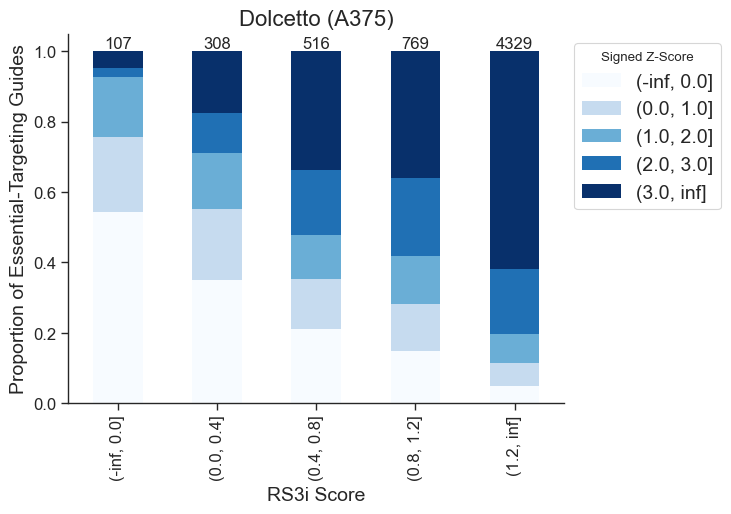

In [23]:
plot_df.plot(kind='bar', stacked=True, edgecolor="none", cmap="Blues")
plt.xlabel('RS3i Score',fontsize=14)
plt.ylabel('Proportion of Essential-Targeting Guides',fontsize=14)
plt.title('Dolcetto (A375)',fontsize=16)
plt.legend(title="Signed Z-Score", bbox_to_anchor=[1, 1], fontsize = 14)
sns.despine()

for i,n_guides in enumerate(total_guides_in_bins):
    plt.text(i,1,str(n_guides),ha='center',va='bottom',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

gpp.savefig('../../Figures/Figure 4/rs3i_dolcetto_stacked_barplot.pdf', dpi=300, bbox_inches = 'tight')